In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('../data/weather_classification_data.csv')

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
print(df['Cloud Cover'].unique())
print(df['Season'].unique())
print(df['Location'].unique())
print(df['Weather Type'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [7]:
label_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


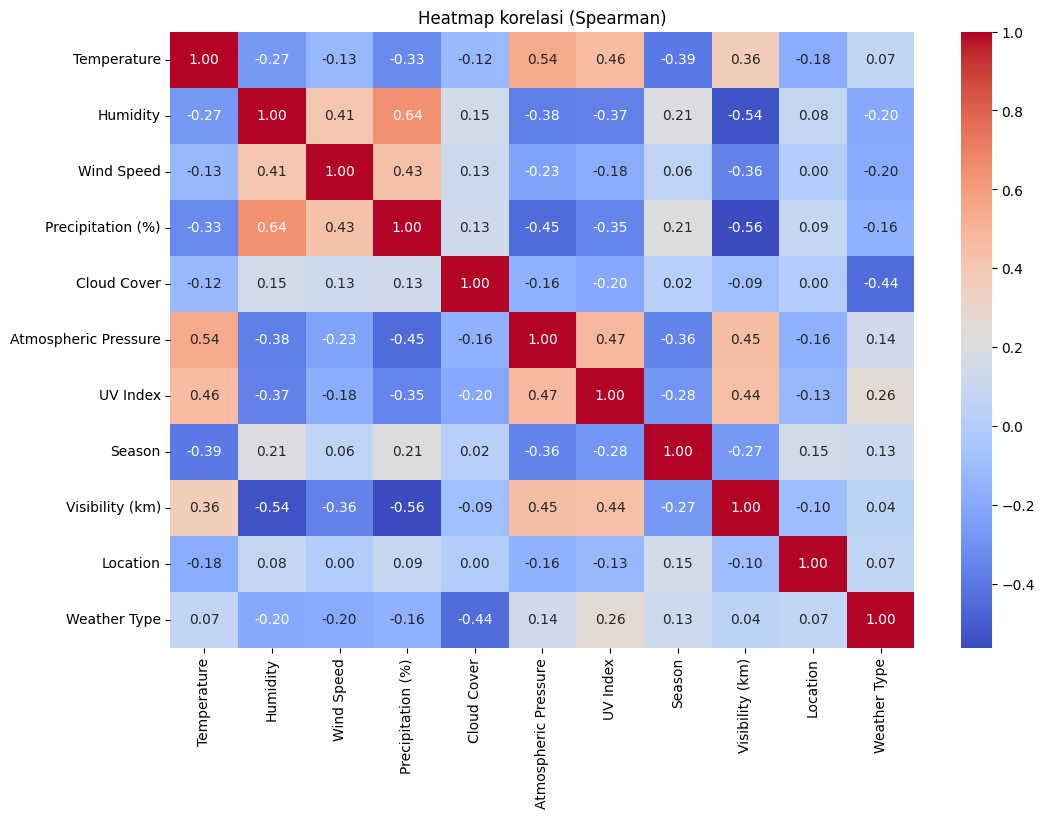

In [8]:
corr = df.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True,
           fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Heatmap korelasi (Spearman)")
plt.show()

In [9]:
df['Weather Type'].value_counts()

Weather Type
1    3300
0    3300
3    3300
2    3300
Name: count, dtype: int64

In [10]:
classes = label_encoders['Weather Type'].classes_
mapping = {i: cls for i, cls in enumerate(classes)}
print(mapping)

{0: 'Cloudy', 1: 'Rainy', 2: 'Snowy', 3: 'Sunny'}


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31584\3672649768.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather Type', data=df, palette='Set2')


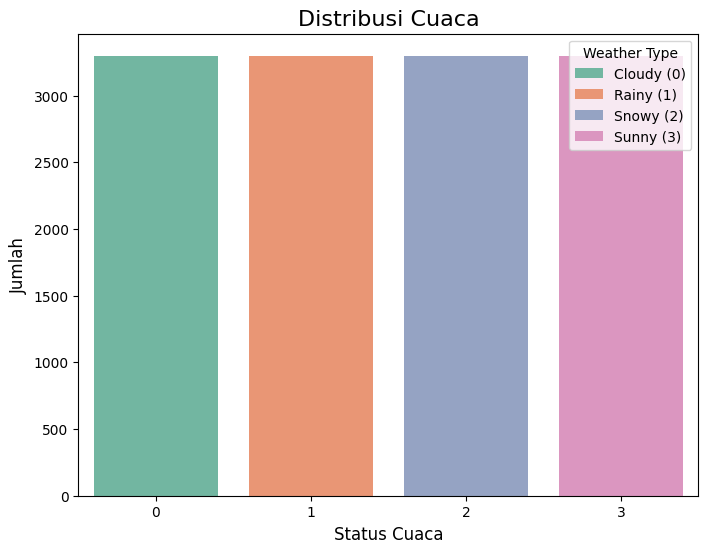

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather Type', data=df, palette='Set2')

plt.title('Distribusi Cuaca', fontsize=16)
plt.xlabel('Status Cuaca',
          fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.legend(
    title='Weather Type',
    labels=['Cloudy (0)', 'Rainy (1)', 'Snowy (2)', 'Sunny (3)'],
    loc='upper right'
)
plt.show()

In [12]:
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

In [13]:
X_test.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
10788,26.0,72,9.0,69.0,3,996.40,3,3,4.0,1
10052,31.0,71,13.0,46.0,3,1005.38,3,3,5.5,0
7071,38.0,51,0.5,1.0,0,1016.26,11,2,5.0,1
9156,17.0,82,16.5,68.0,2,1005.12,0,3,2.0,1
3837,46.0,102,8.0,105.0,3,1016.57,4,3,10.5,2


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])

[[-1.50484353  0.07142947 -1.21527274  0.57485863  0.00749271 -0.43837101
  -0.77813687  0.98478749 -1.024227    1.14908808]
 [-1.21634579 -0.42429555  0.52440058  0.66861308  0.00749271 -0.21029017
  -0.77813687  0.98478749 -0.2857228   1.14908808]
 [-1.04324715  1.31074201 -0.8528408   1.35614574  0.00749271 -0.48366556
  -1.0374258   0.98478749 -0.72882532 -0.1141193 ]
 [ 0.05304424 -0.47386805  0.01699586 -1.17522451  0.9965301   0.25364395
   1.55546347  0.12845054  1.1912856   1.14908808]
 [ 0.57234017 -1.8123256  -0.99781358 -1.20647599 -1.97058208  0.17323942
   1.8147524  -0.7278864   0.15737972 -1.37732669]]


In [17]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best Params (k):", grid.best_params_)
print("Best Score (CV):", grid.best_score_)

Best Params (k): {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score (CV): 0.9005681818181819


In [19]:
best_knn = grid.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Prediksi
y_pred = best_knn.predict(X_test_scaled)

In [20]:
model = grid.best_estimator_
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       660
           1       0.87      0.89      0.88       660
           2       0.94      0.91      0.92       660
           3       0.93      0.88      0.91       660

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



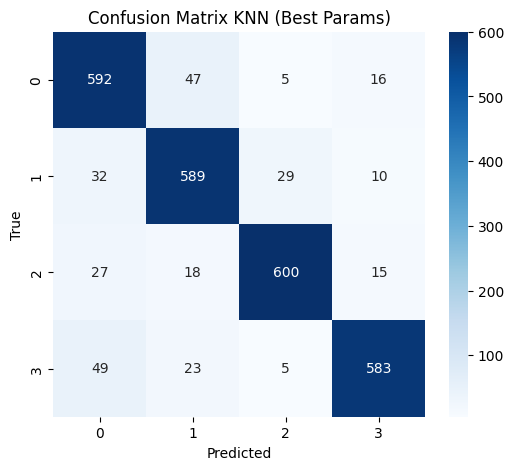

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [22]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.9005681818181819
Std Dev: 0.0024511702851410413


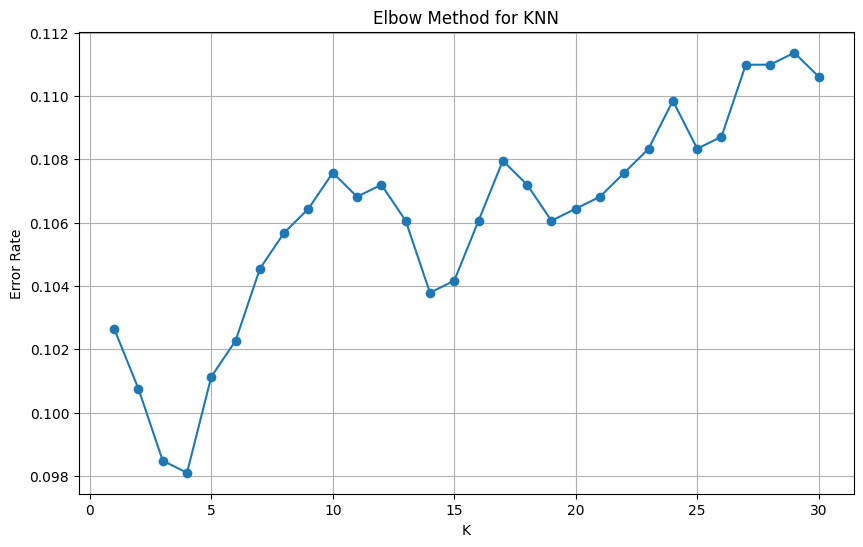

In [23]:
errors = []

for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    pred = knn_temp.predict(X_test_scaled)
    errors.append(np.mean (pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,31), errors, marker='o')
plt.title("Elbow Method for KNN")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()